In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

# Mini Projeto 15 - Brusselator (Algoritmo de Gillespie)

Sistema de transformações

1. $A \to X$
2. $B + X \to Y + D$
3. $2X + Y \to 3X $
4. $X \to E $


Taxas de conversão

1. $r_1$
2. $r_2[X]$
3. $r_3[Y][X][X-1]/2$
4. $r_4[X]$

Com $r_1, r_2, r_3, r_4$ constantes dadas

In [10]:
def gillespie_brusselator(rates, x_0, y_0, time):
    X = []
    Y = []
    all_times = []
    
    x = x_0
    y = y_0
    t = 0
    while t <= time:
        r1 = rates[0]
        r2 = rates[1] * x
        r3 = rates[2] * y * ((x * (x-1))/2)
        r4 = rates[3] * x
        
        total_rates = r1 + r2 + r3 + r4
        
        p = rnd.random()
        
        if p >= 0 and p < r1/total_rates:
            x += 1
        
        elif p >= r1/total_rates and p < (r1 + r2)/total_rates:
            x -= 1
            y += 1
            
        elif p >= (r1 + r2)/total_rates and p < (r1 + r2 + r3)/total_rates:
            x += 1
            y -= 1
            
        else:
            x -= 1
           
        X.append(x)
        Y.append(y)
        
        tau = (1/total_rates) * np.log(1/rnd.random())
        all_times.append(t)
        t += tau
        
    return all_times, X, Y

## Resultados

In [4]:
a = 5000
b = 50
c = 0.00005
d = 5
rates = [a,b,c,d]

In [5]:
x_0 = 1000
y_0 = 2000
buss_res = gillespie_brusselator(rates, x_0, y_0, time=10)

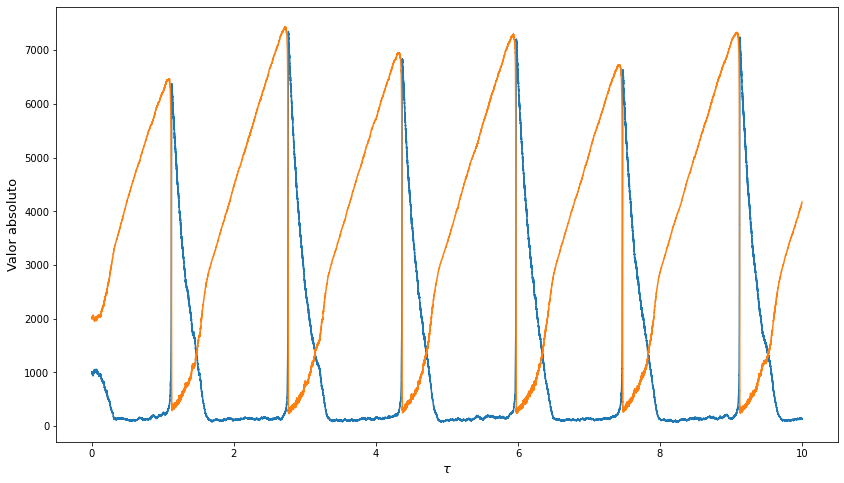

In [8]:
plt.figure(figsize=(14,8))
plt.plot(buss_res[0], buss_res[1], '-', label='X')
plt.plot(buss_res[0], buss_res[2], '-', label='Y')

plt.xlabel(r'$\tau$', fontsize=13)
plt.ylabel("Valor absoluto", fontsize=13)
plt.show()

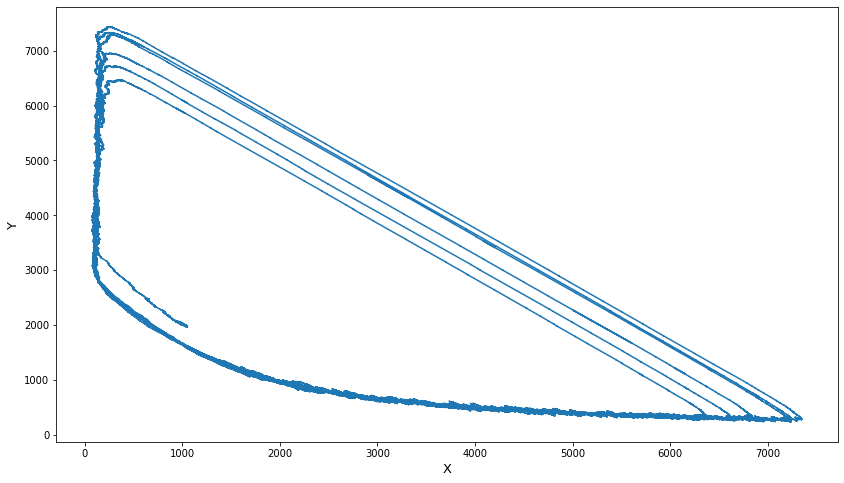

In [9]:
plt.figure(figsize=(14,8))
plt.plot(buss_res[1], buss_res[2], '-')

plt.xlabel('X', fontsize=13)
plt.ylabel('Y', fontsize=13)
plt.show()